In [ ]:
!sudo pip install -U geopandas
!sudo pip install -U pysal

In [6]:
%matplotlib inline
# import plotly.plotly as py
# from plotly.graph_objs import *

# py.sign_in('ipeirotis', 'iys6jgwd1k')

In [1]:
import requests
import json
import geopandas as gpd
import pandas as pd
import ast

In [2]:
# Download locally the GeoJSON files from http://eric.clst.org/Stuff/USGeoJSON

!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_500k.json' -o 'us_states_high_detail.json'
!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_5m.json'   -o 'us_states_medium_detail.json'
!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_20m.json'  -o 'us_states_low_detail.json'

!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_050_00_500k.json' -o 'us_counties_high_detail.json'
!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_050_00_5m.json '  -o 'us_counties_medium_detail.json'
!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_050_00_20m.json'  -o 'us_counties_low_detail.json'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2432k  100 2432k    0     0   851k      0  0:00:02  0:00:02 --:--:--  851k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2492k  100 2492k    0     0   767k      0  0:00:03  0:00:03 --:--:--  767k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1392k  100 1392k    0     0   806k      0  0:00:01  0:00:01 --:--:--  807k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.4M  100 22.4M    0     0  2860k      0  0:00:08  0:00:08 --:--:-- 3990k
  % Total    % Received % Xferd  Average Speed   Tim

In [3]:
geojson=open('us_states_high_detail.json', 'r').read()
states_geojson = json.loads(geojson)["features"]
df_states = gpd.GeoDataFrame.from_features(states_geojson)
df_states = df_states[ df_states.STATE!='02' ] #drop Alaska
df_states = df_states[ df_states.STATE!='15' ] #drop Hawaii
df_states = df_states[ df_states.STATE!='72' ] #drop Puerto Rico
df_states.set_index('STATE',inplace=True)
df_states.sort_index(inplace=True)


In [4]:
df_states.head()

CENSUSAREA       GEO_ID LSAD        NAME  \
STATE                                             
01      50645.326  0400000US01          Alabama   
04     113594.084  0400000US04          Arizona   
05      52035.477  0400000US05         Arkansas   
06     155779.220  0400000US06       California   
08     103641.888  0400000US08         Colorado   

                                                geometry  
STATE                                                     
01     (POLYGON ((-85.002368 31.000682, -85.024108 31...  
04     POLYGON ((-109.045223 36.999084, -109.045244 3...  
05     POLYGON ((-94.55929 36.499496, -94.51947800000...  
06     (POLYGON ((-122.446316 37.861046, -122.438565 ...  
08     POLYGON ((-102.04224 36.993083, -102.054503 36...

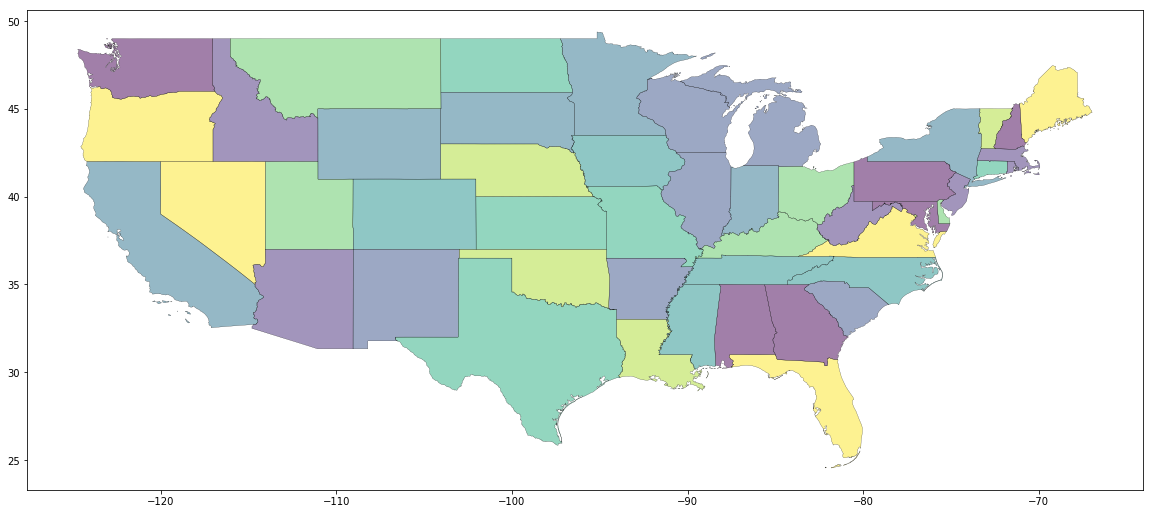

In [7]:
df_states.plot(figsize=(20,30), linewidth=0.2)

In [8]:
# US Counties GeoJSON
geojson=open('us_counties_high_detail.json', 'r', encoding = "ISO-8859-1").read()
counties_geojson = json.loads(geojson)["features"]
df_counties = gpd.GeoDataFrame.from_features(counties_geojson)



In [9]:
df_counties=df_counties[ df_counties.STATE!='02' ] #drop Alaska
df_counties=df_counties[ df_counties.STATE!='15' ] #drop Hawaii
df_counties=df_counties[ df_counties.STATE!='72' ] #drop Puerto Rico


In [10]:
df_counties.set_index(['STATE','COUNTY'],inplace=True)
df_counties.sort_index(inplace=True)

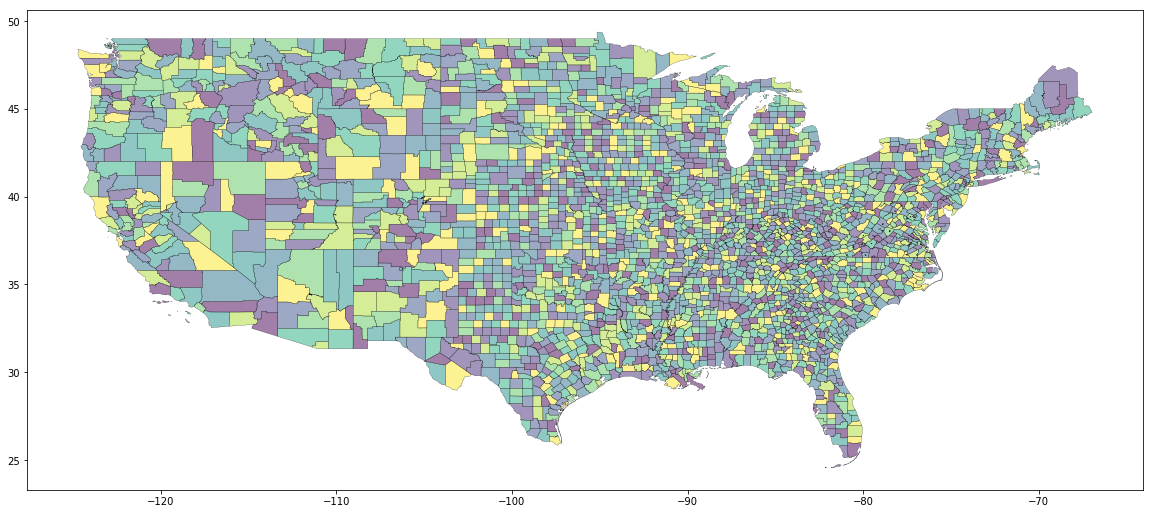

In [11]:
df_counties.plot(figsize=(20,30), linewidth=0.2)

### Getting Census Data

First of all, you need to get an API Key from http://api.census.gov/data/key_signup.html.

In [12]:
class Census:
    def __init__(self, key):
        self.key = key

    def get(self, fields, geo, year=2010, dataset='sf1'):
        fields = [','.join(fields)]
        template_url = 'http://api.census.gov/data/{year}/{dataset}?key={key}&get='
        base_url = template_url.format(year=str(year), dataset=dataset, key=self.key)
        query = fields
        for item in geo:
            query.append(item)
        add_url = '&'.join(query)
        url = base_url + add_url
        response = requests.get(url)
        return response.text

api_key = '627d4107b57d4576f2120d2b87b59c7440e5d2af'
census = Census(api_key)

In [16]:
state = census.get(['P0010001'], ['for=state:*'])
df_state_population = pd.DataFrame(ast.literal_eval(state), columns = ['Population', 'STATE'])
df_state_population['Population'] = pd.to_numeric(df_state_population['Population'],errors='coerce')
df_state_population.drop(0,axis=0,inplace=True)
df_state_population.set_index('STATE',inplace=True)
df_state_population.sort_index(inplace=True)
df_state_population

Population
STATE            
01      4779736.0
02       710231.0
04      6392017.0
05      2915918.0
06     37253956.0
08      5029196.0
09      3574097.0
10       897934.0
11       601723.0
12     18801310.0
13      9687653.0
15      1360301.0
16      1567582.0
17     12830632.0
18      6483802.0
19      3046355.0
20      2853118.0
21      4339367.0
22      4533372.0
23      1328361.0
24      5773552.0
25      6547629.0
26      9883640.0
27      5303925.0
28      2967297.0
29      5988927.0
30       989415.0
31      1826341.0
32      2700551.0
33      1316470.0
34      8791894.0
35      2059179.0
36     19378102.0
37      9535483.0
38       672591.0
39     11536504.0
40      3751351.0
41      3831074.0
42     12702379.0
44      1052567.0
45      4625364.0
46       814180.0
47      6346105.0
48     25145561.0
49      2763885.0
50       625741.0
51      8001024.0
53      6724540.0
54      1852994.0
55      5686986.0
56       563626.0
72      3725789.0

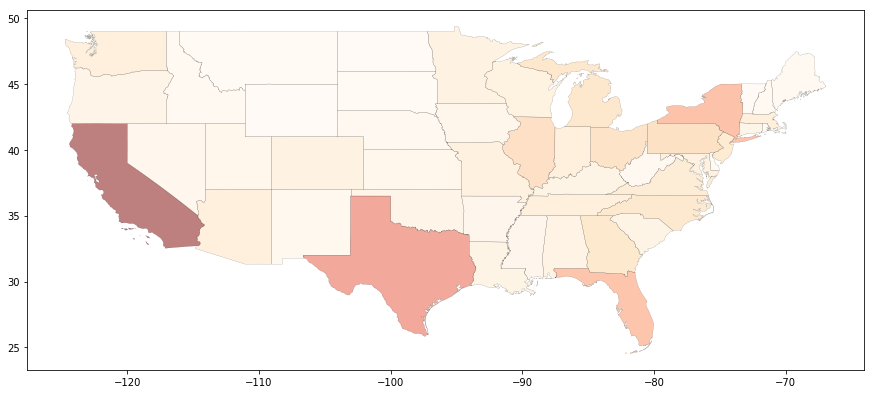

In [14]:
df_states.join(df_state_population).plot(figsize=(15,7), column='Population', cmap='OrRd',  linewidth=0.1)

/usr/local/lib/python3.5/dist-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "percentiles". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


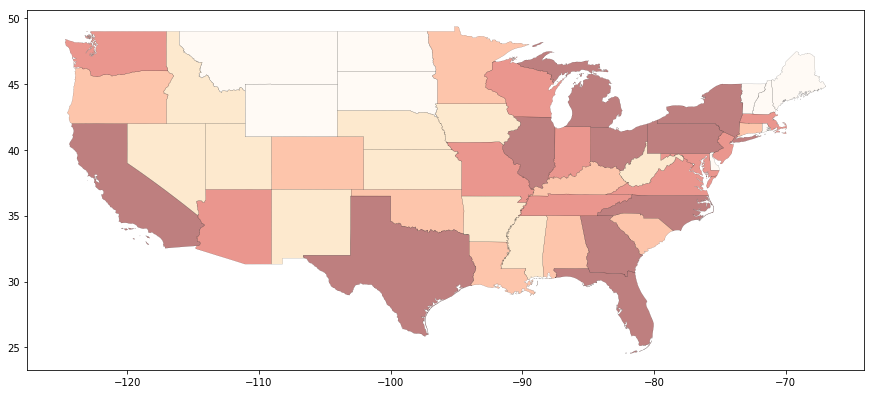

In [17]:
df_states.join(df_state_population).plot(figsize=(15,7), column='Population', scheme='percentiles', cmap='OrRd',  linewidth=0.1)

In [18]:
import math
county = census.get(['P0010001'], ['in=state:*', 'for=county:*'])
df_county_population = pd.DataFrame(ast.literal_eval(county), columns = ['Population', 'STATE', 'COUNTY'])
df_county_population['Population'] = pd.to_numeric(df_county_population['Population'],errors='coerce')
df_county_population.drop(0,axis=0,inplace=True)
df_county_population.set_index(['STATE','COUNTY'],inplace=True)
df_state_population.sort_index(inplace=True)

# county_result = ast.literal_eval(county)

In [19]:
# df_county_population['LogPopulation'] = df_county_population['Population'].apply(math.log)

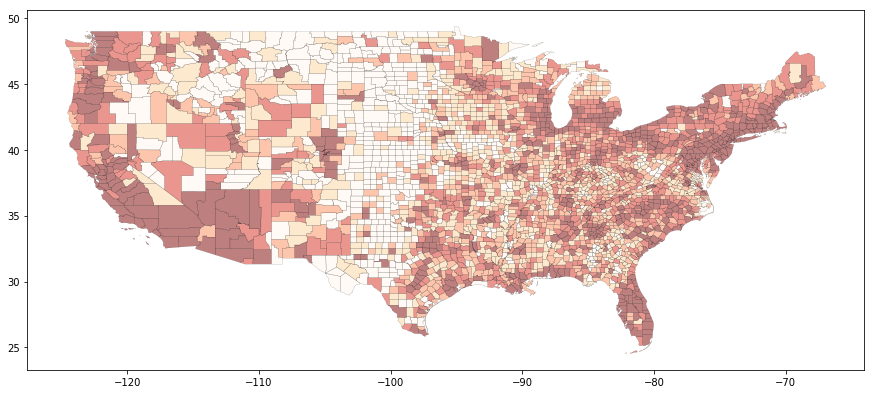

In [20]:
df_counties.join(df_county_population).plot(figsize=(15,7), column='Population', cmap='OrRd', scheme='Quantiles', linewidth=0.1)